### Example: GridSearchESNPredictive

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-2)]: Done 274 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-2)]: Done 498 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-2)]: Done 810 out of 810 | elapsed:   25.2s finished


best parameters: {'bias': 0, 'leak_rate': 0.2, 'n_inputs': 1, 'n_outputs': 1, 'n_reservoir': 10, 'n_transient': 150, 'noise': 0.001, 'sparsity': 0.4, 'spectral_radius': 0.99}
best parameters index: 59
best score: 0.010083856602108022


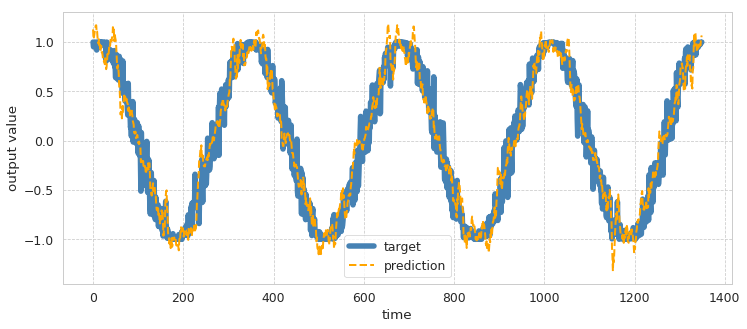

In [24]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from echoes import ESNPredictive
from echoes.plotting import plot_predicted_ts, set_mystyle
from echoes.model_selection import GridSearchESNPredictive
set_mystyle()


n_steps = 5000
# Generate signal
raw = (np.linspace(0, 30*np.pi, n_steps) 
       + np.random.normal(scale=0.15, size=n_steps)  # add a bit of noise
      ).reshape(-1,1)
inputs = np.sin(raw)
outputs = np.cos(raw)

# Split data - we'll tune hyperparameters based only on training
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, 
                                                    shuffle=False, test_size=0.3)

param_grid = dict(
    # Fixed params
    n_inputs=[1],
    n_outputs=[1],
    n_transient=[150],
    # Variable params
    n_reservoir=[5, 10, 15],
    sparsity=[0, .2, .4],
    bias=[0, .5, 1],
    spectral_radius=np.linspace(.8, .99, 5),
    noise=[0, .001],
    leak_rate=[.2, .4, 1],
)

grid = GridSearchESNPredictive(
    param_grid=param_grid,
    test_size=0.3,
    strip_transient=True,
    verbose=3,
    n_jobs=-2
).fit(X_train, y_train)

print("best parameters:", grid.best_params_)
print("best parameters index:", grid.best_params_idx_)
print("best score:", grid.best_score_)

# Predict with best parameters on test set
esn = ESNPredictive(**grid.best_params_).fit(X_train, y_train)
pred = esn.predict(X_test)

plot_predicted_ts(y_test[esn.n_transient:], 
                  pred[esn.n_transient:], 
                  figsize=(12, 5))

In [25]:
# We can export results as pandas DataFrame
grid.to_dataframe().head()

# or as cvs
grid.to_dataframe().to_csv("filename")

,bias,leak_rate,n_inputs,n_outputs,n_reservoir,n_transient,noise,sparsity,spectral_radius,scores
0,0.0,0.2,1,1,5,150,0.0,0.0,0.8000,0.061093
1,0.0,0.2,1,1,5,150,0.0,0.0,0.8475,0.129114
2,0.0,0.2,1,1,5,150,0.0,0.0,0.8950,0.071877
3,0.0,0.2,1,1,5,150,0.0,0.0,0.9425,0.165087
4,0.0,0.2,1,1,5,150,0.0,0.0,0.9900,0.075239
